<a href="https://colab.research.google.com/github/shimul1725/Car-Price-Prediction-LinearRegression-with-Python/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Importing required libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# reading the dataset
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# finding the shape of our dataset
df.shape

(205, 26)

In [8]:
# Let's get some information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
# checking for null values using missingno module
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
#Let us start by looking at descriptive statistic parameters for the dataset. We will use describe() for this.
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
# Create a list to store all numerical variable
numerical_feature = [feature for feature in df.columns if df[feature].dtypes not in ['O', 'object'] ]

print("Number of Numerical Variable ", len(numerical_feature))

df[numerical_feature].head()

Number of Numerical Variable  16


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


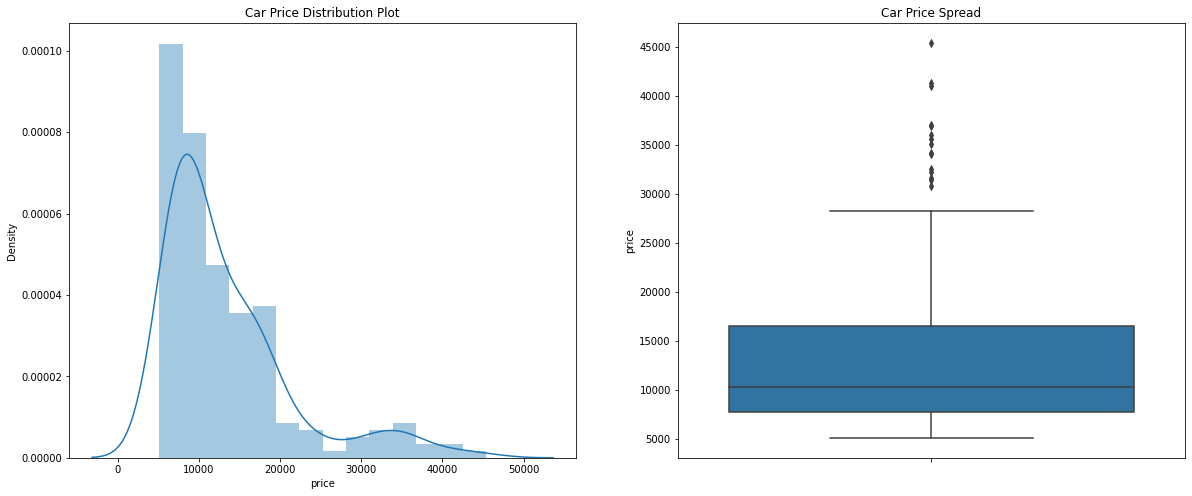

In [14]:
# Let's get some information about our target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df["price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df["price"])

plt.show()

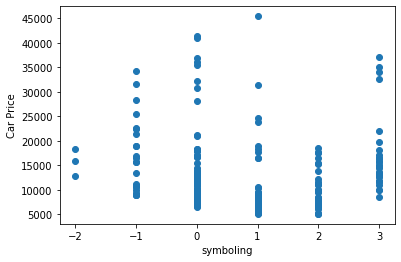

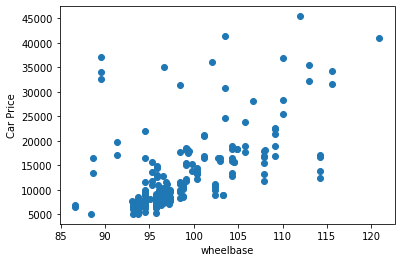

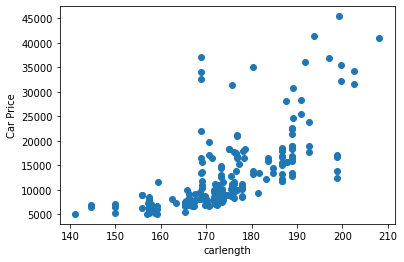

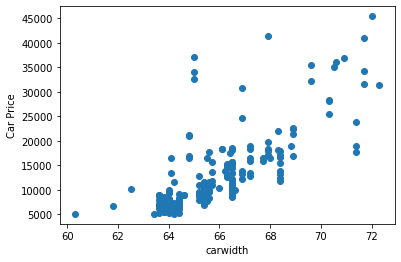

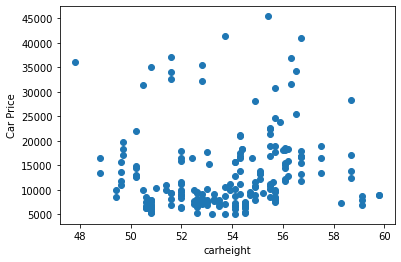

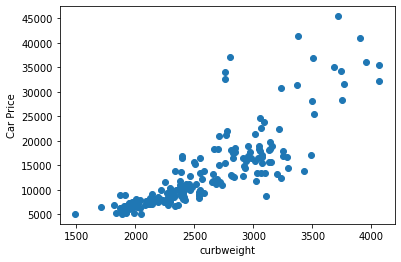

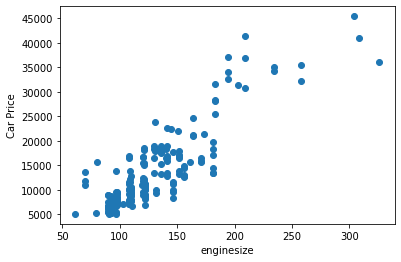

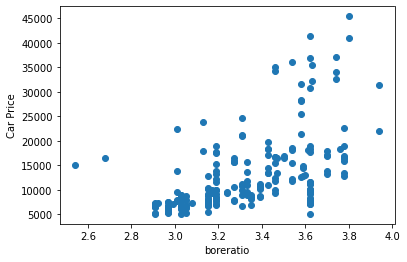

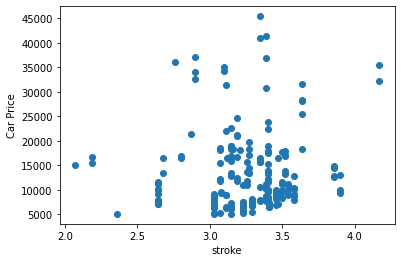

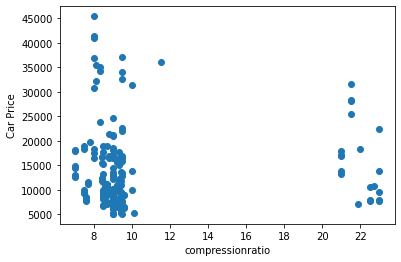

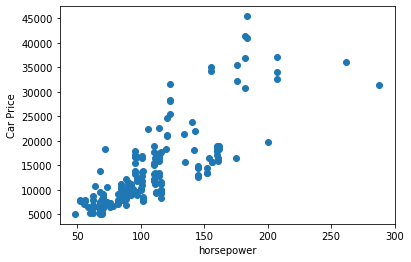

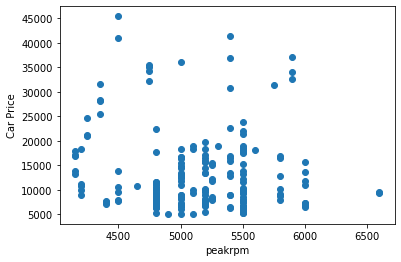

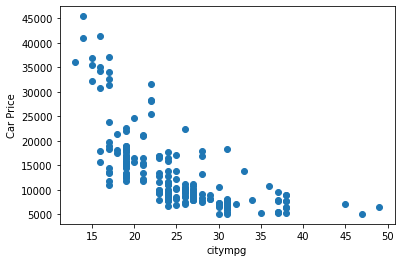

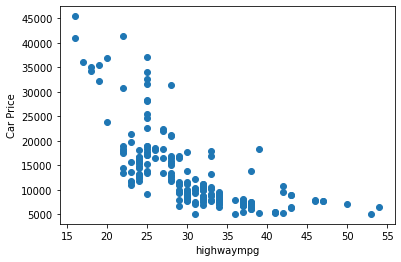

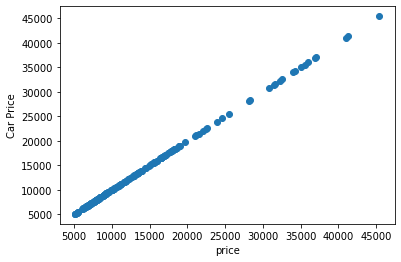

In [15]:
# Now let's find the relationship between independent and dependent numerical features

for feature in numerical_feature:
    if feature not in ["car_ID"]:
        plt.scatter(y=df["price"], x=df[feature])
        plt.ylabel("Car Price")
        plt.xlabel(feature)
        plt.show()

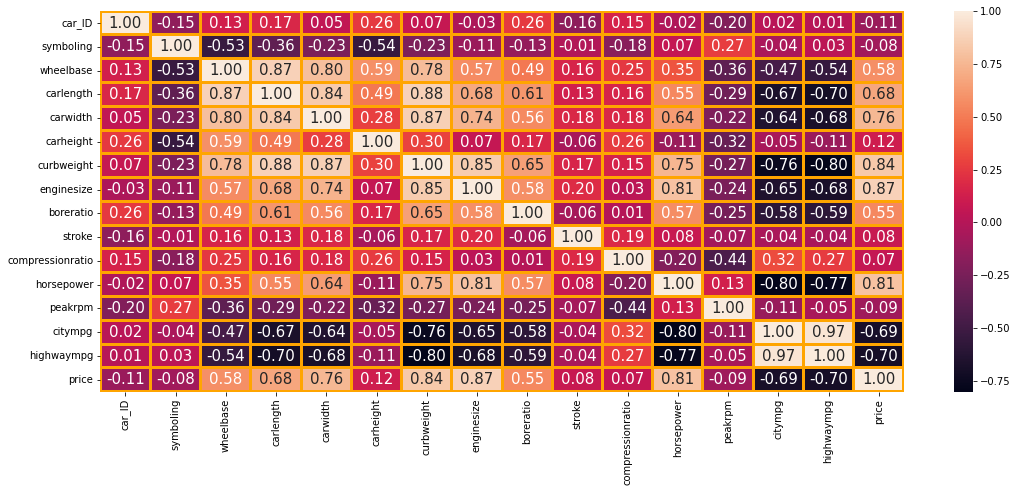

In [16]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df[numerical_feature].corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

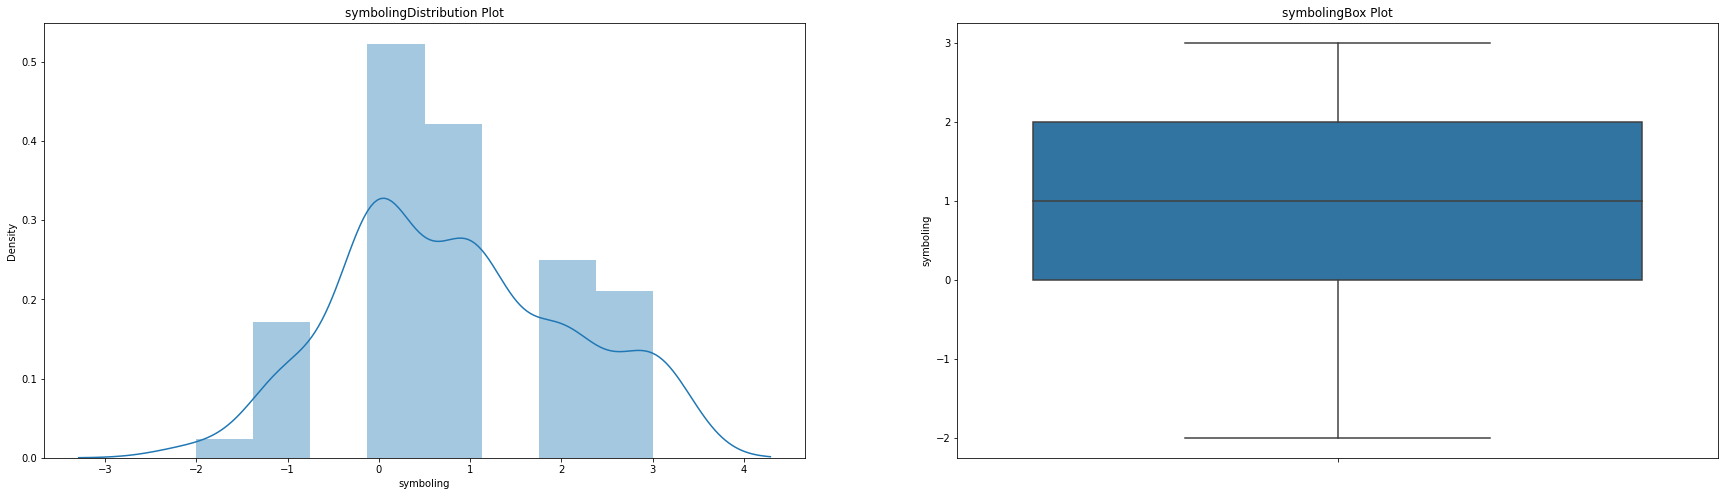

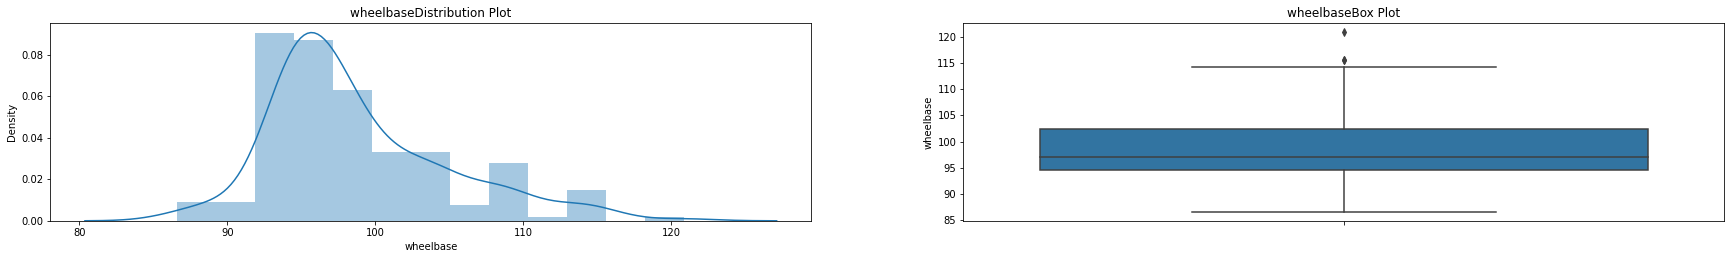

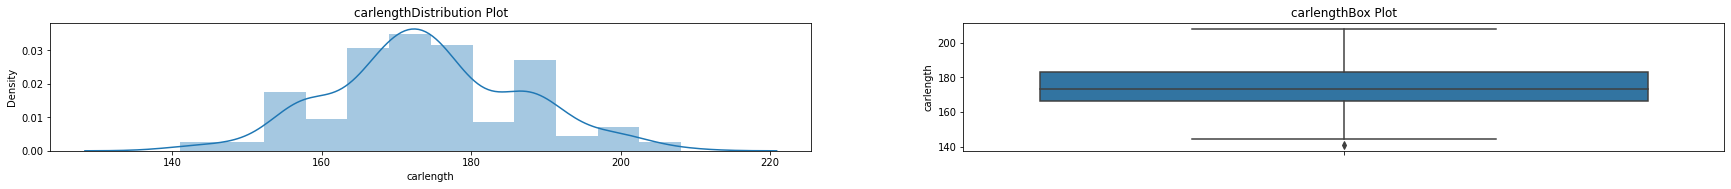

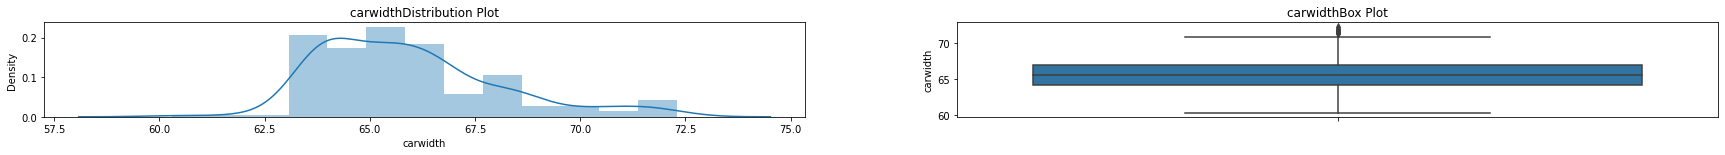

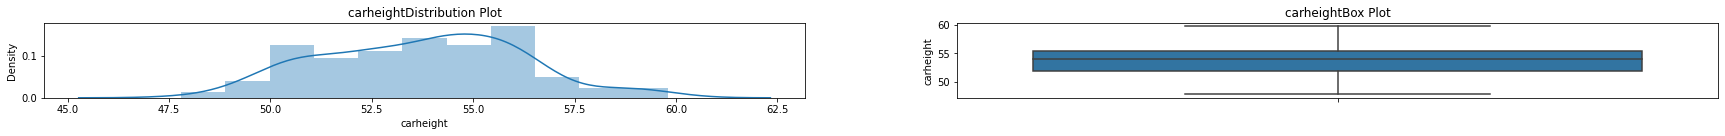

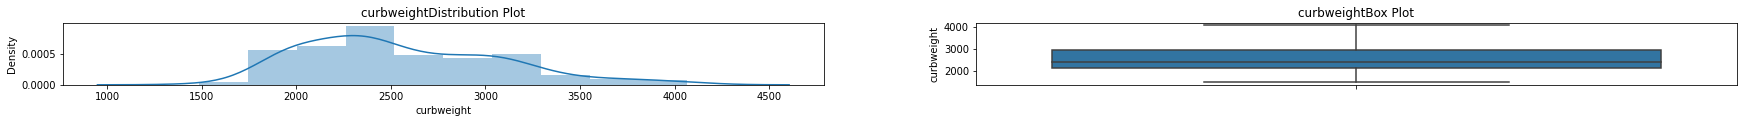

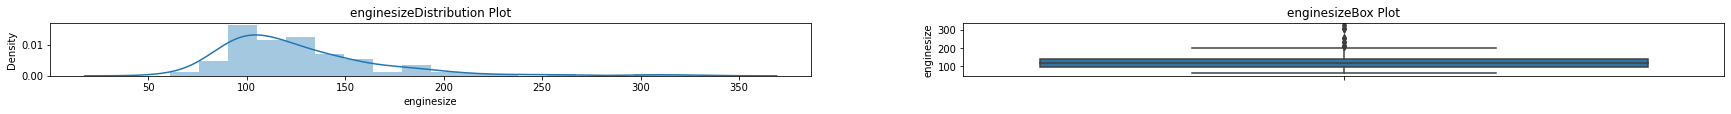

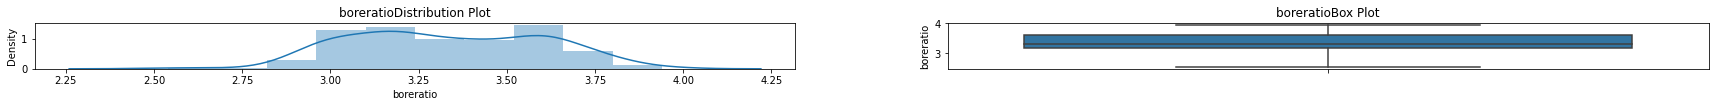

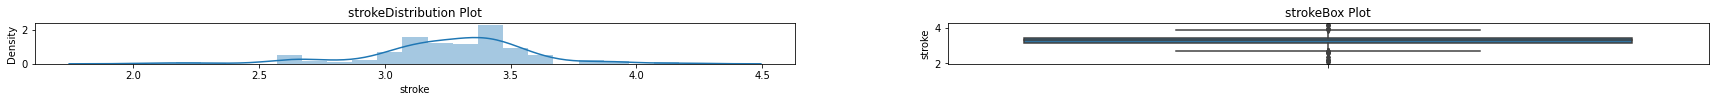

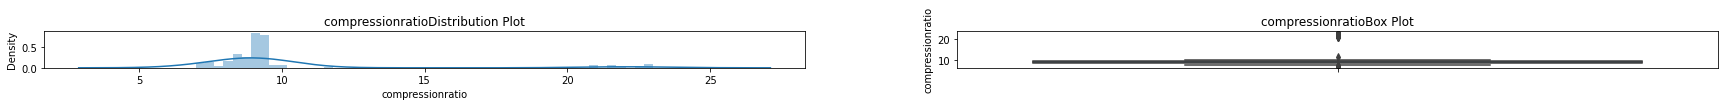

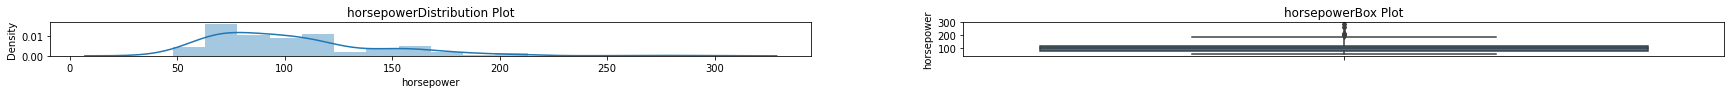

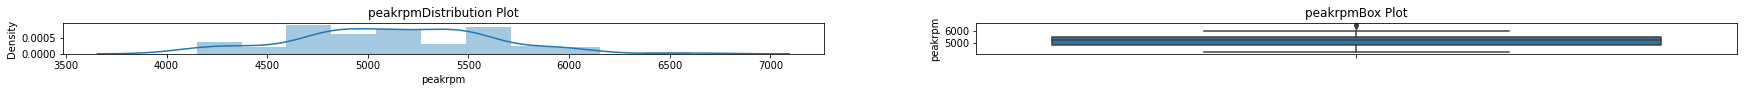

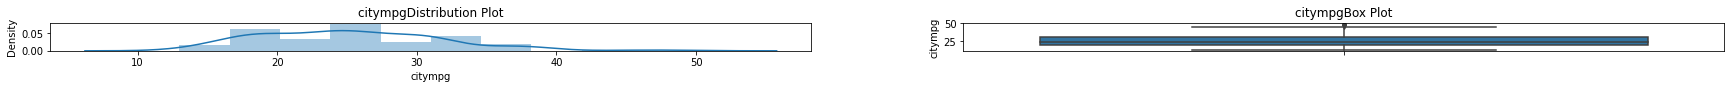

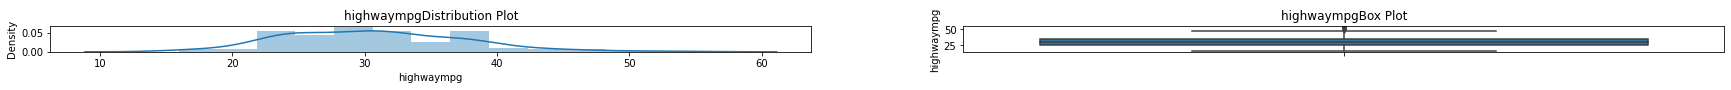

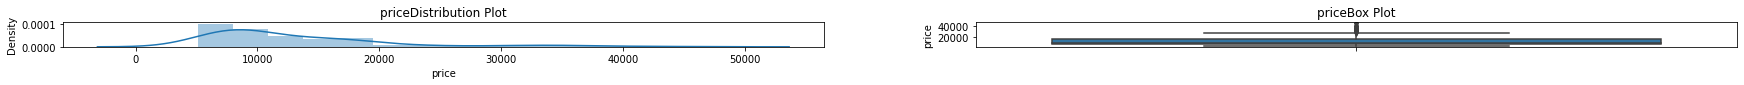

In [17]:
index = 1
for feature in numerical_feature:
    if feature not in ["car_ID"]:
        plt.figure(figsize=(30,8))
        # first plot 
        plt.subplot(index,2,1)
        plt.title(feature + 'Distribution Plot')
        sns.distplot(df[feature])
        # second plot
        plt.subplot(index,2,2)
        plt.title(feature + 'Box Plot')
        sns.boxplot(y=df[feature])

        plt.show()
        index = index + 1
        


In [20]:
# Create a list to store all Categorical variable
categorical_feature = [feature for feature in df.columns if df[feature].dtypes  in ['O', 'object'] ]

print("Number of Categorical Variable ", len(categorical_feature))

df[categorical_feature].head()

Number of Categorical Variable  10


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


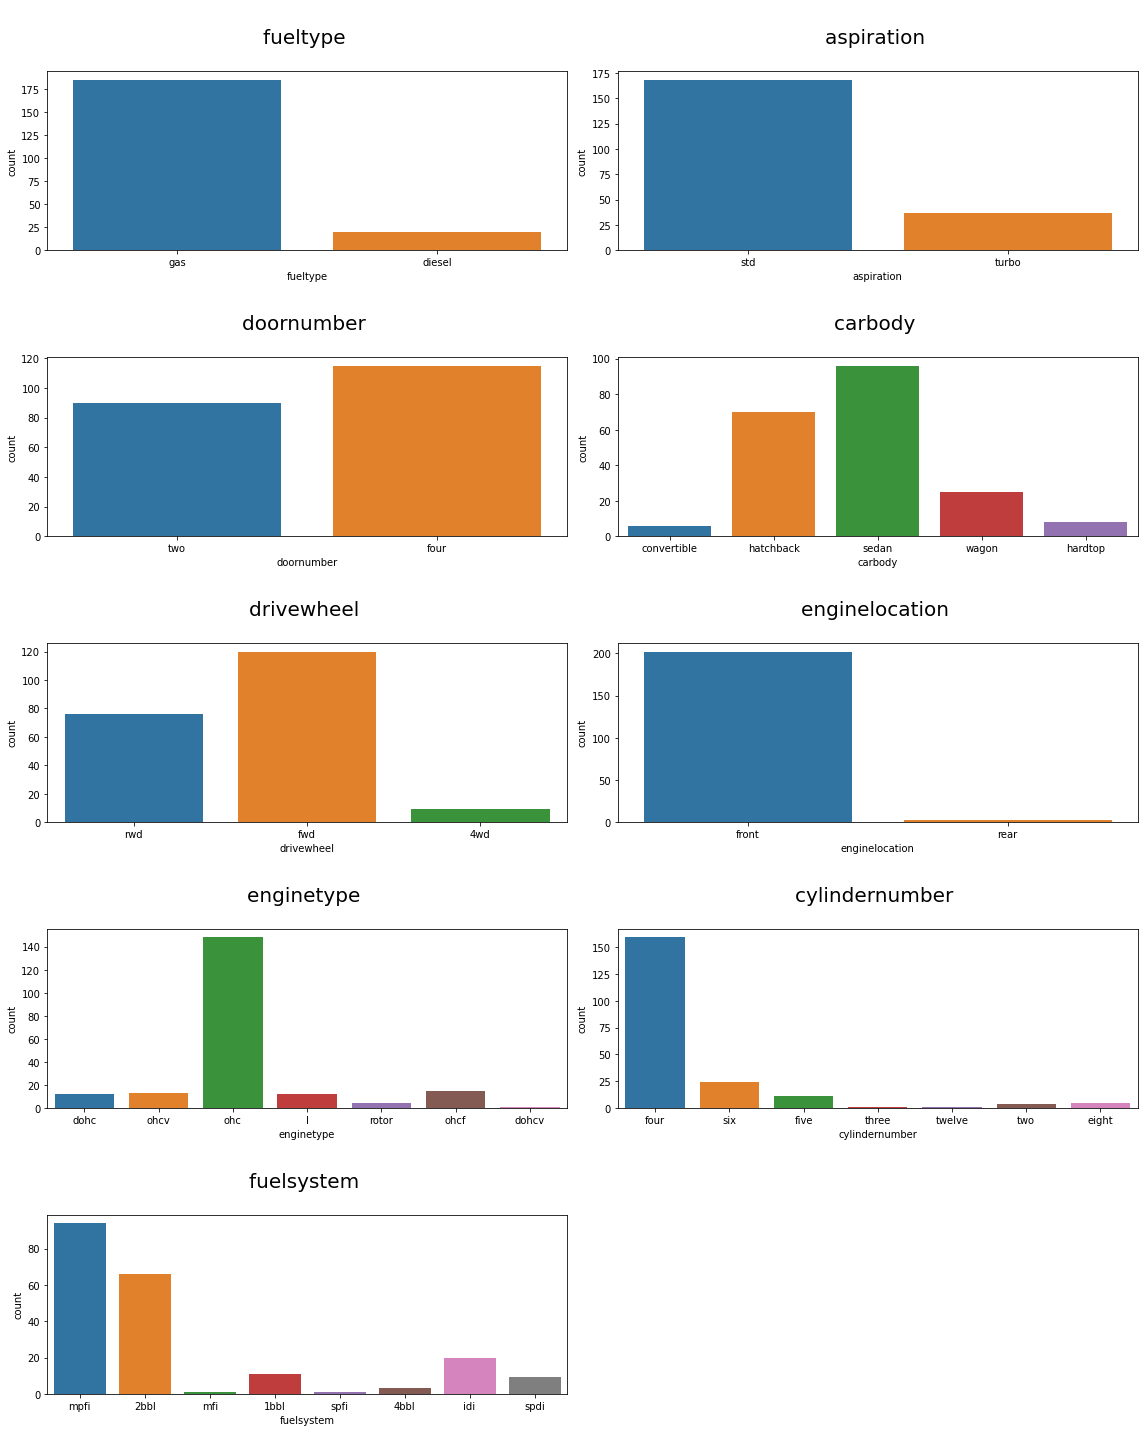

In [19]:
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(categorical_feature)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = categorical_feature[i], data = df, ax = ax)
        plt.title(f"\n{categorical_feature[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

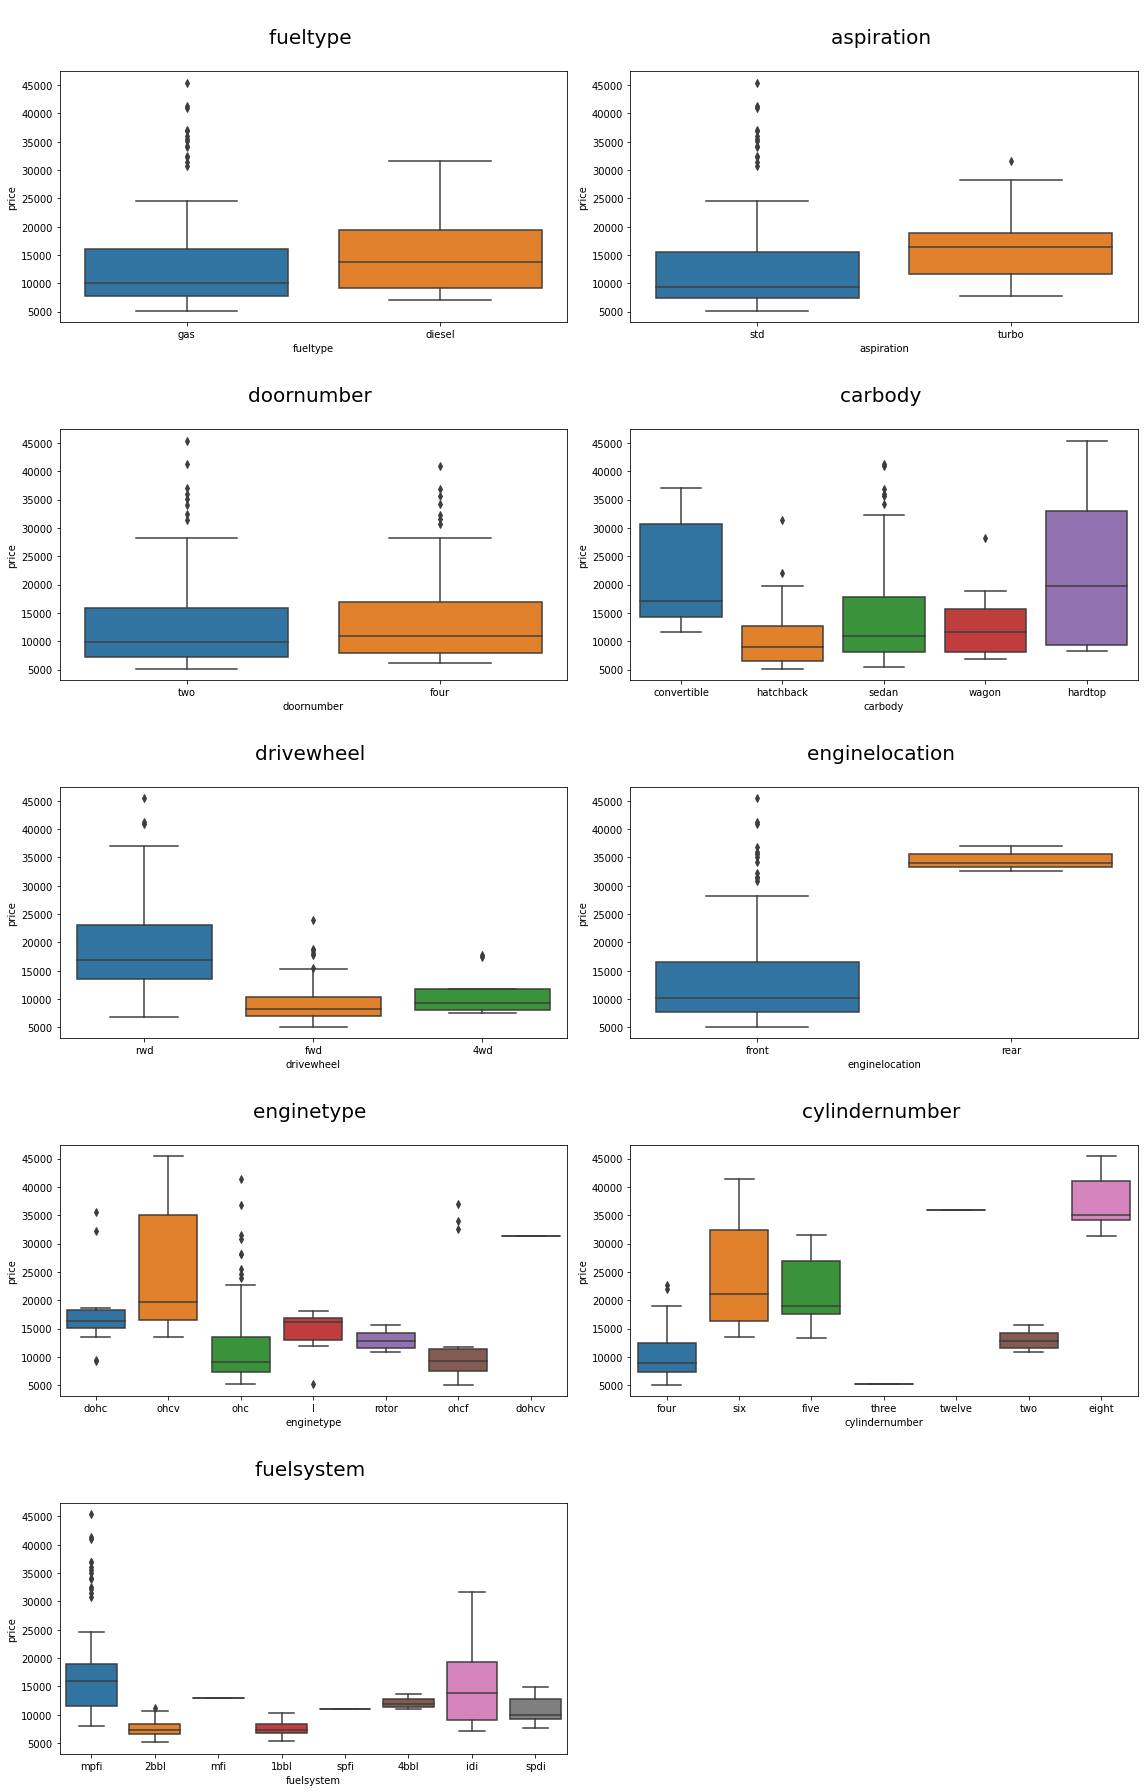

In [22]:
#Box plot for each categorical features

plt.figure(figsize = (16, 25))
plotnumber = 1

for i in range(1, len(categorical_feature)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(x = categorical_feature[i] ,y = df['price'], data = df, ax = ax)
        plt.title(f"\n{categorical_feature[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [25]:
#Univeriant Analysis
categorical_feature

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [26]:
# Analysing the car name
df["CarName"].count()

205

In [27]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [28]:
print(df["CarName"].value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64


In [29]:
# Now extract the car company name and use it instade of car name

#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)

In [30]:
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
df["CompanyName"] = df["CompanyName"].str.lower()

def replace_name(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [32]:
#Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


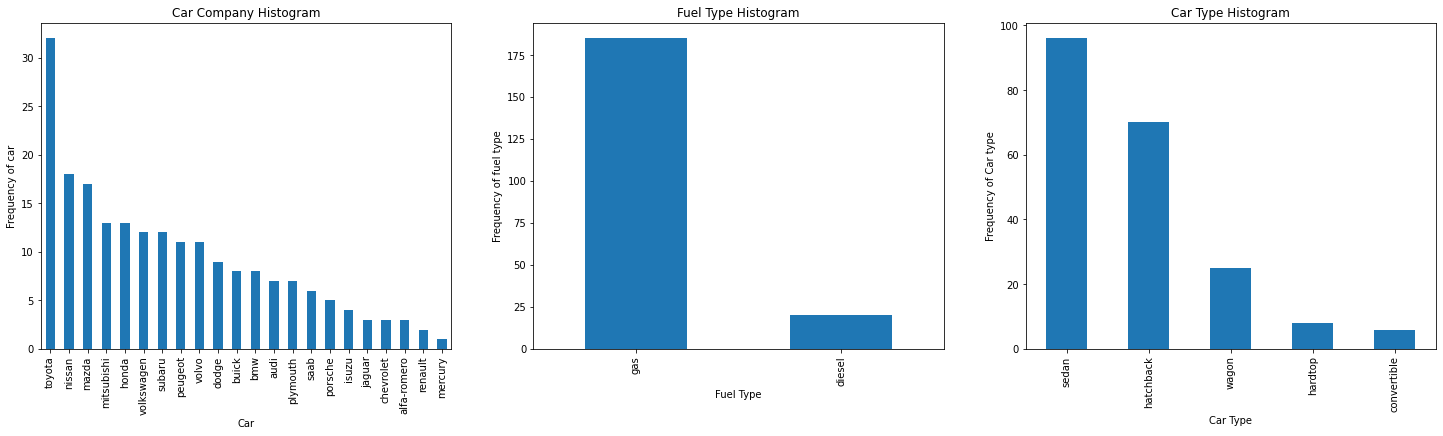

In [33]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df["CompanyName"].value_counts().plot(kind = 'bar')
plt.title('Car Company Histogram')
plt1.set(xlabel = 'Car', ylabel='Frequency of car')

plt.subplot(1,3,2)
plt1 = df["fueltype"].value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df["carbody"].value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


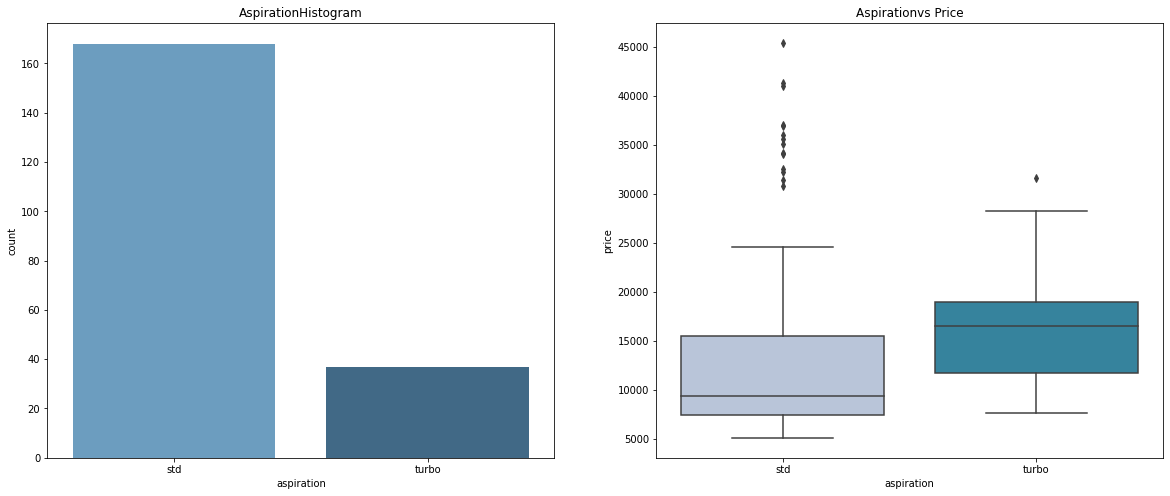

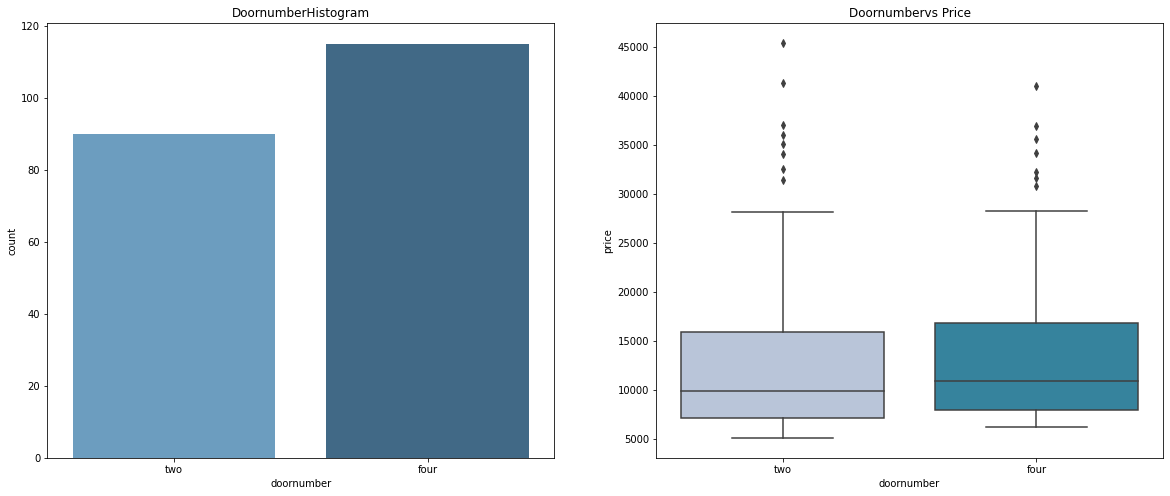

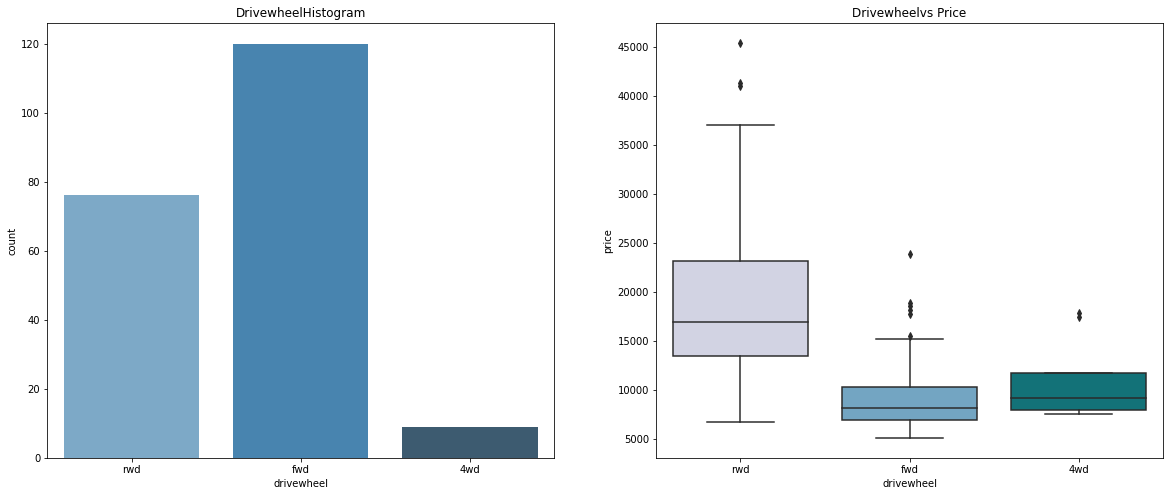

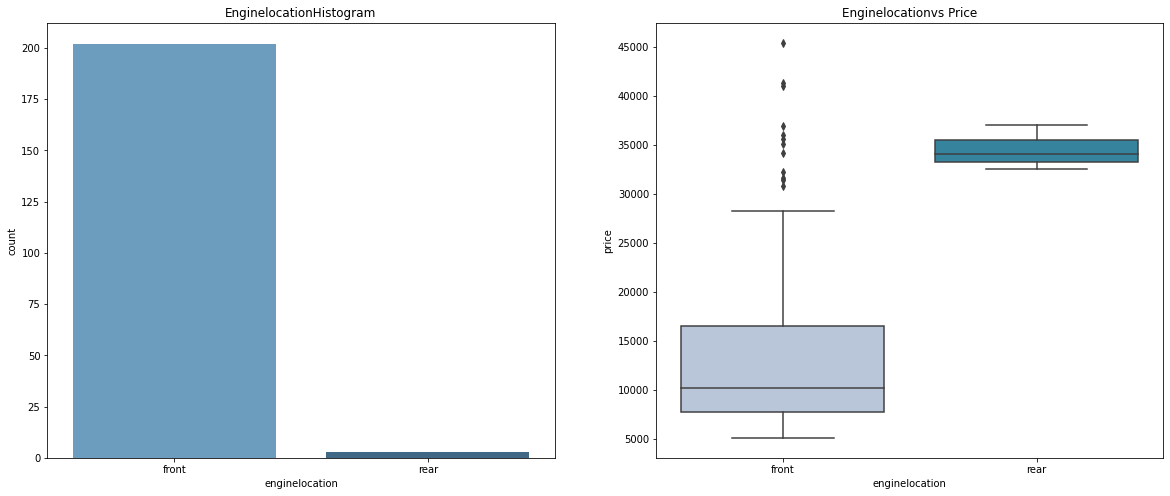

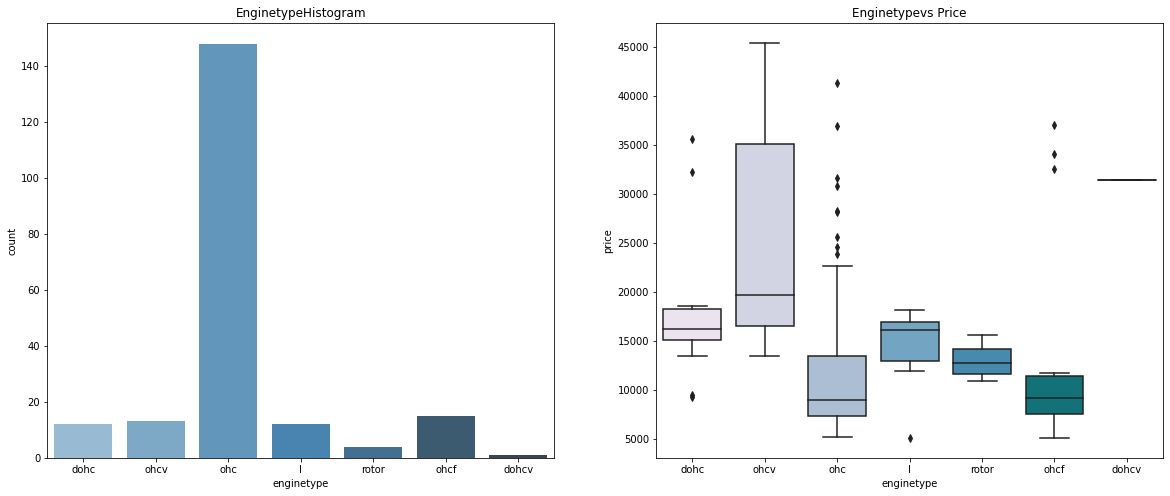

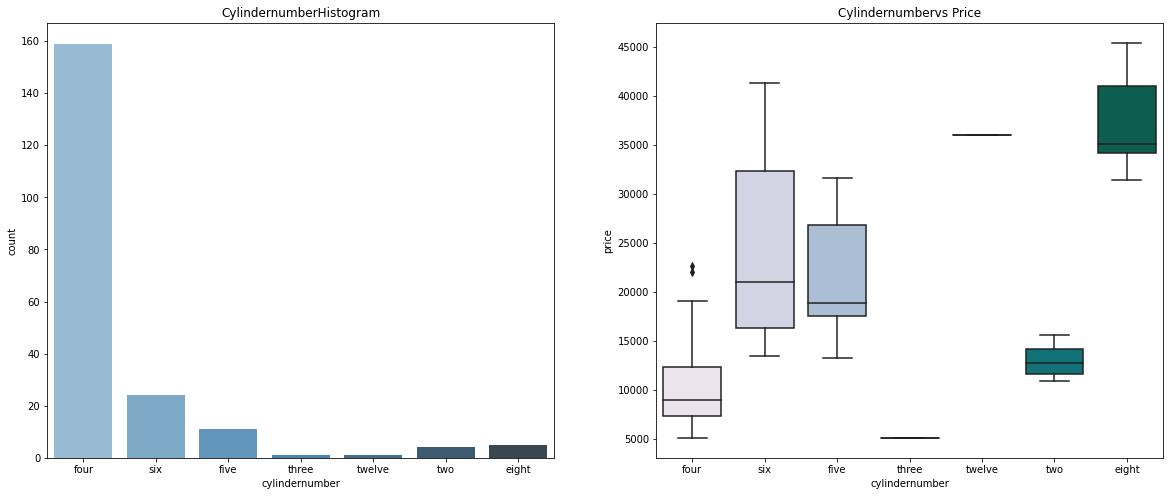

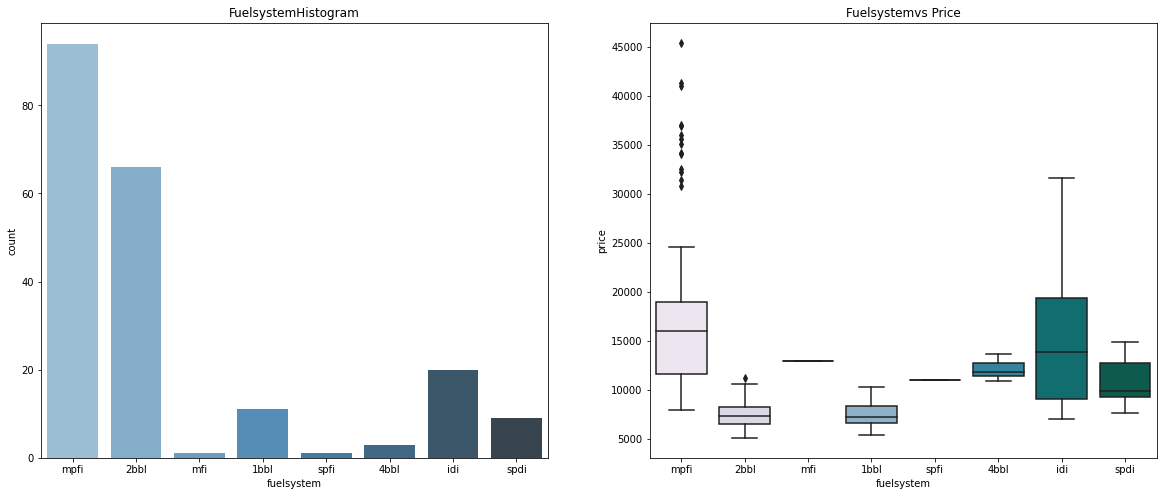

In [34]:
# Analysing other features as well 
cat_columns = ['aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for feature in cat_columns:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(feature.title() + 'Histogram')
    sns.countplot(df[feature], palette=("Blues_d"))

    plt.subplot(1,2,2)
    plt.title(feature.title() + 'vs Price')
    sns.boxplot(x=df[feature], y=df["price"], palette=("PuBuGn"))

    plt.show()

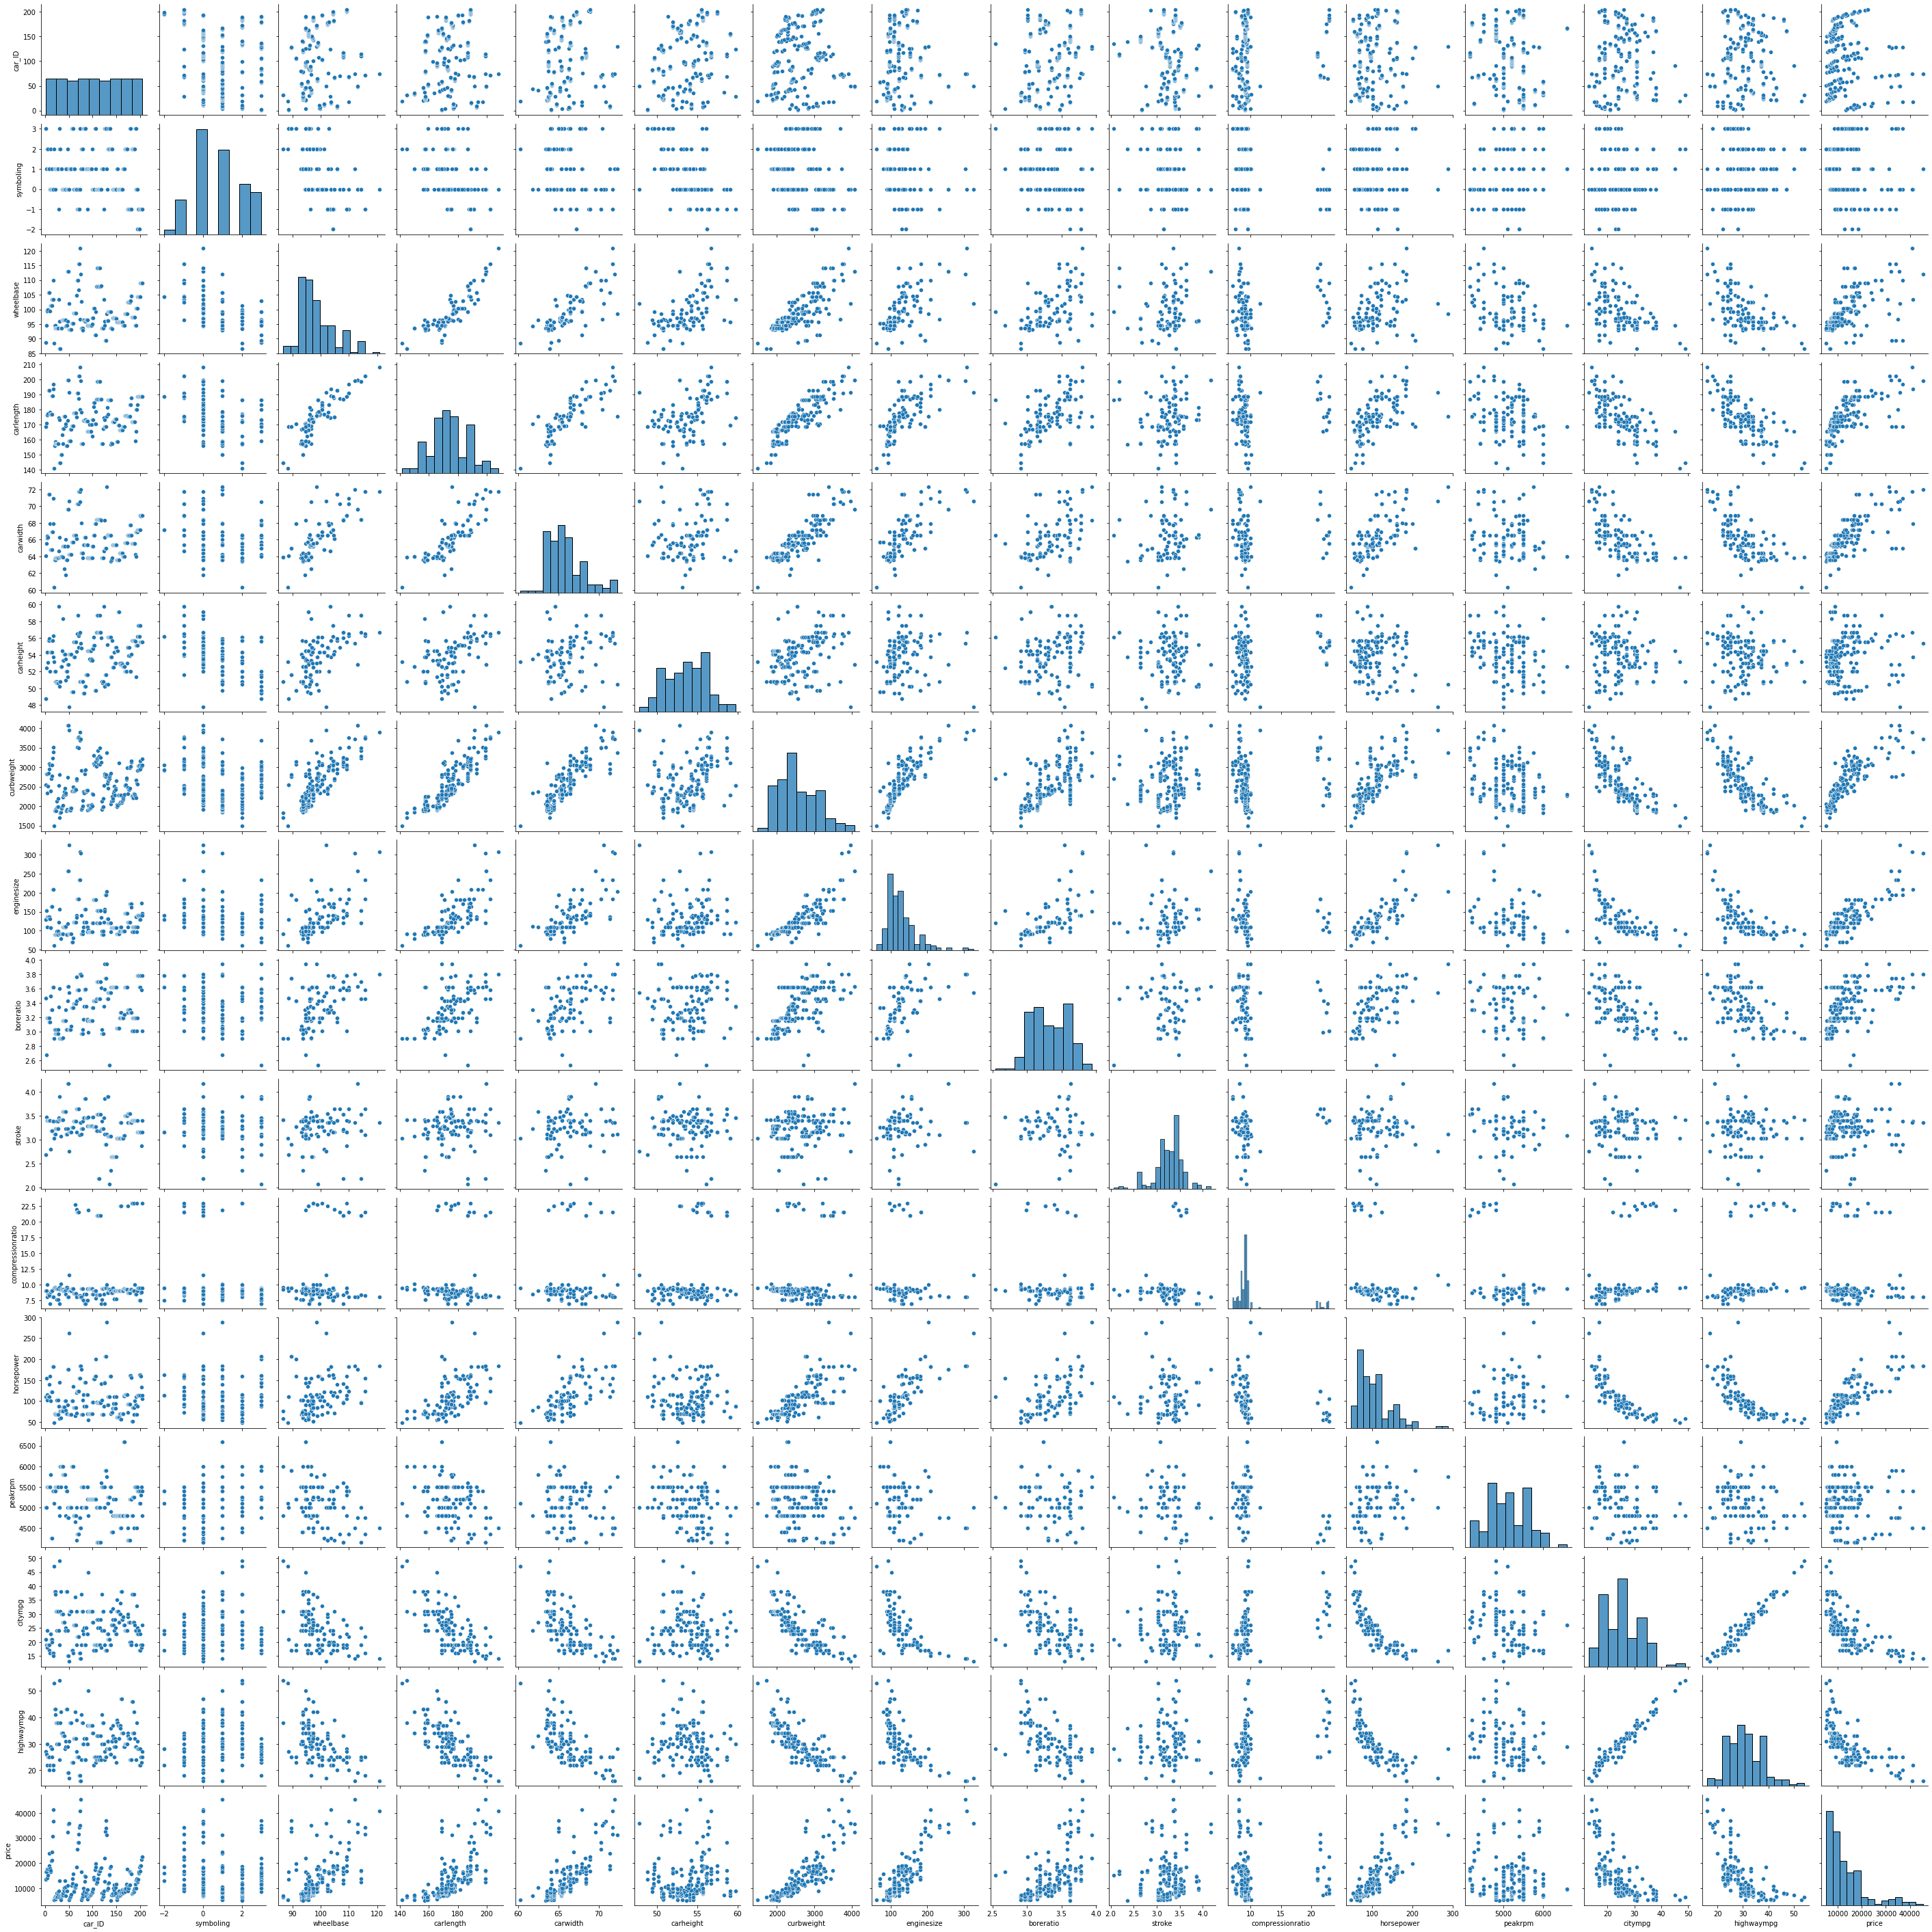

In [35]:
#Bivariate and Multivariate Analysis
sns.pairplot(df)
plt.show()

In [36]:
#Data Preprocessing
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
# drop the index from dataset
df.drop(columns = ['car_ID'], axis = 1, inplace = True)

In [38]:
# encoding ordinal categorical columns
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [39]:
# creating features and label variable
X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [40]:
# encoding categorical columns
X = pd.get_dummies(X, drop_first = True)
X.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [42]:
X.shape

(205, 59)

In [49]:
X = X.drop(["CompanyName_subaru","enginelocation_rear","enginetype_ohcf"], axis = 1)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
print("Traing Data Shape of x and y respectively:  ", X_train.shape, y_train.shape)
print("Testing Data Shape of x and y respectively:  ", X_test.shape, y_test.shape)

Traing Data Shape of x and y respectively:   (164, 56) (164,)
Testing Data Shape of x and y respectively:   (41, 56) (41,)


In [53]:
#Model Building
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = lr_model.predict(X_test)

In [55]:
 #Model Evaluation
 from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
r2_score = r2_score(y_pred, y_test)

In [56]:
lr_model.score(X_test, y_test)

0.9023732935167722

In [57]:
mse

7707044.755024148

In [58]:
rmse = np.sqrt(mse)
rmse

2776.1564716391886

In [59]:
r2_score

0.9088748380231088